Using real-time data augmentation.


Epoch 1/100
1563/1563 [==============================] - 105s 66ms/step - loss: 1.9314 - accuracy: 0.3338 - val_loss: 1.5049 - val_accuracy: 0.4350
Epoch 2/100
1563/1563 [==============================] - 206s 132ms/step - loss: 1.5393 - accuracy: 0.4347 - val_loss: 1.3126 - val_accuracy: 0.5227
Epoch 3/100
1563/1563 [==============================] - 513s 329ms/step - loss: 1.4215 - accuracy: 0.4820 - val_loss: 1.5936 - val_accuracy: 0.4393
Epoch 4/100
1563/1563 [==============================] - 234s 150ms/step - loss: 1.3310 - accuracy: 0.5171 - val_loss: 1.5251 - val_accuracy: 0.4635
Epoch 5/100
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2547 - accuracy: 0.5499 - val_loss: 1.2570 - val_accuracy: 0.5450
Epoch 6/100
1563/1563 [==============================] - 108s 69ms/step - loss: 1.1978 - accuracy: 0.5709 - val_loss: 1.2240 - val_accuracy: 0.5629
Epoch 7/100
1563/1563 [==============================] - 124s 79ms/step - loss: 1.1503 - accuracy: 0.5914 - va

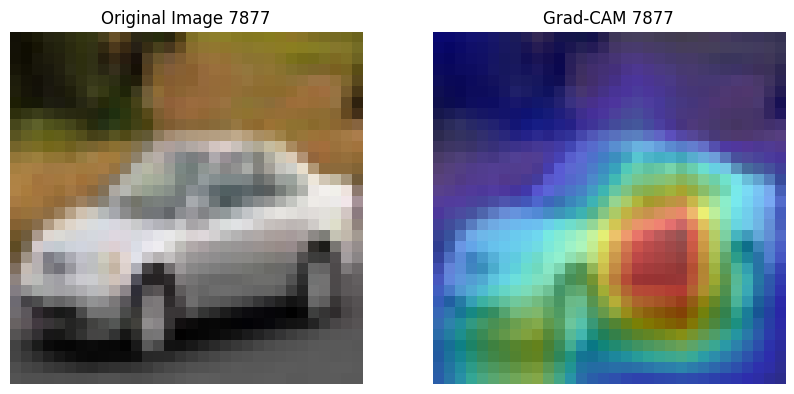

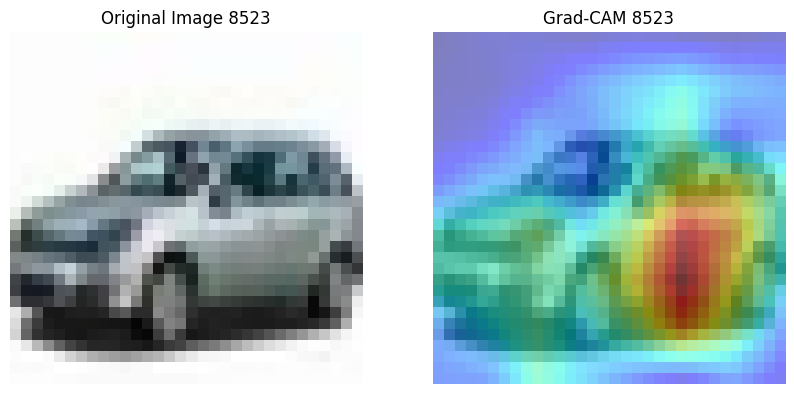

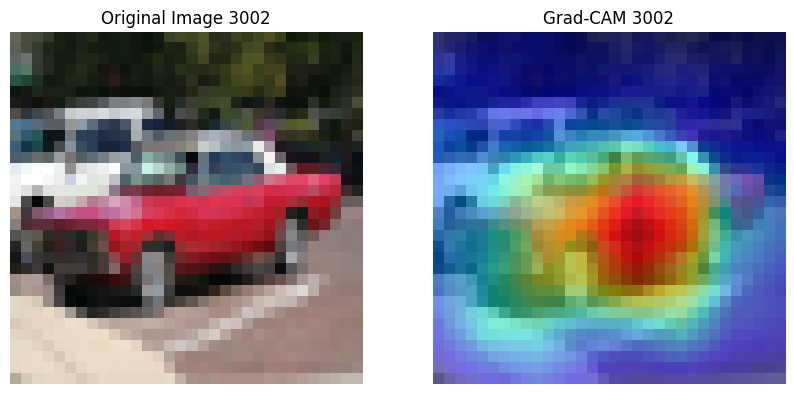

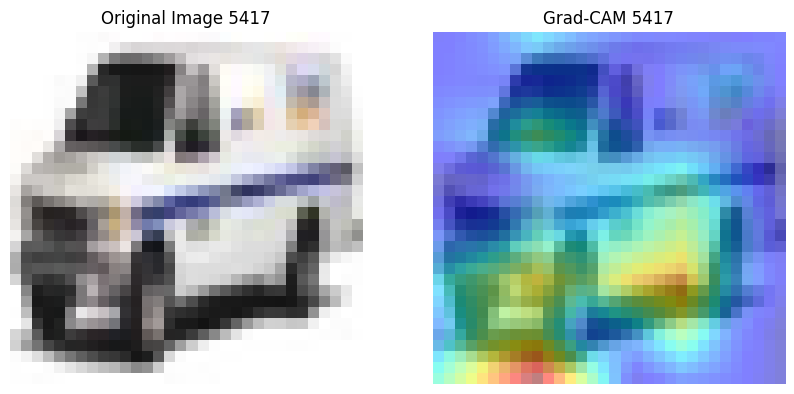

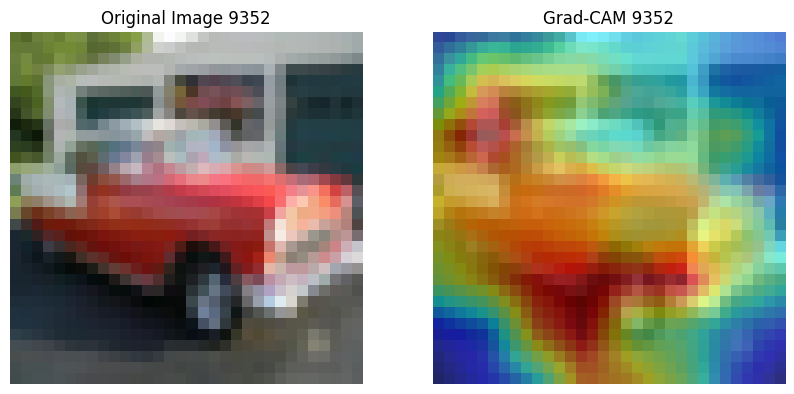

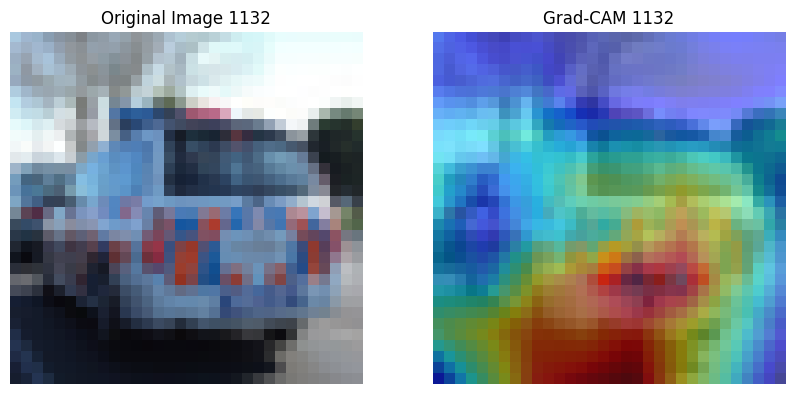

/Users/devynmiller/Downloads/CHAPMAN MSBCE/SP 24/CPSC/cpsc-542-assignment-1/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at models/model.h5
313/313 [==============================] - 6s 21ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1000
           1       0.94      0.94      0.94      1000
           2       0.85      0.78      0.81      1000
           3       0.83      0.67      0.74      1000
           4       0.84      0.85      0.85      1000
           5       0.83      0.78      0.80      1000
           6       0.75      0.96      0.84      1000
           7       0.89      0.91      0.90      1000
           8       0.93      0.92      0.93      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[868  11  33   8  10   0   9   8  31  22]
 [  7 941   0   0   1   1   5   0   6  39]
 [ 31   0 780  14  43  32  70  20   2   8]
 [  9   2  28 668  36 106

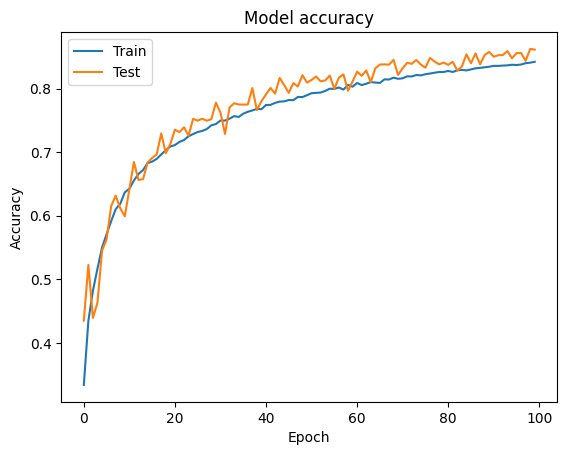

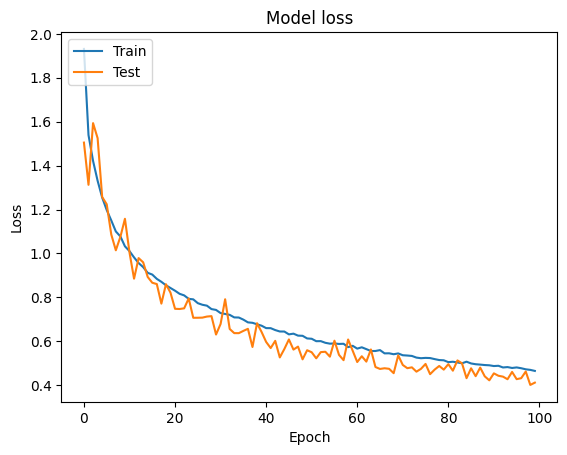

313/313 [==============================] - 6s 18ms/step


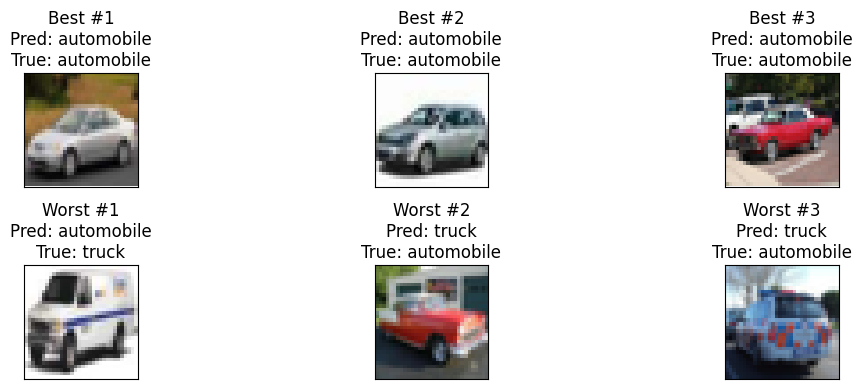

In [ ]:
from src.data_preprocessing.data_loader import data
from src.data_preprocessing.data_preprocessing import one_hot_encode
from src.model.architecture import build_model
from src.model.training import train_model
from src.evaluation.metrics import evaluate_model
from src.evaluation.visualize_results import plot_results, display_best_worst_images
from src.evaluation.grad_cam import grad_cam_analysis
from tensorflow.keras.models import load_model
import os

# Save the model
def save_model(model, model_name='model.h5'):
    '''Save the model to a file'''
    # Choose a path where to save the model
    model_path = os.path.join('models', model_name)
    model.save(model_path)
    print(f"Model saved at {model_path}")
    return model_path

# Load saved model
def load_saved_model(model_path):
    '''Load saved model from file'''
    return load_model(model_path)

def main():
    '''Train, evaluate and save the model, and display the results.'''
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = data()
    x_train, x_test, y_train, y_test = one_hot_encode(x_train, x_test, y_train, y_test)

    # Build and train the model
    model = build_model()
    history = train_model(model, x_train, y_train, x_test, y_test)

    # Grad-CAM analysis
    grad_cam_analysis(model, x_test, y_test)

    # Save the trained model
    model_path = save_model(model)

    # Load the model (if needed)
    # model = load_saved_model(model_path)

    # Evaluate the model
    evaluate_model(model, x_test, y_test)
    plot_results(history)
    
    # Generate predictions for the test set
    predictions = model.predict(x_test)

    # Define classes
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Display the 3 best and 3 worst images based on prediction confidence
    display_best_worst_images(x_test, y_test, predictions, class_names)


if __name__ == '__main__':
    main()
